<a href="https://colab.research.google.com/github/leoserpa/scripts/blob/main/K_Means_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## KMeans - Agrupamento de Dados

## Importando bibliotecas ##

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Carregando a base de dados iris

In [ ]:
iris = pd.read_csv("iris.csv")

In [ ]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Separando os valores de dados e classes

In [ ]:
X = iris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Convertendo valores categórios de classe em numéricos

In [ ]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [ ]:
y = y.apply(converte_classe)
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

## Instânciando o Algoritmo K-means com 3 clusters ##

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [ ]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

## Centroids ##

In [ ]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## Tabela de distância ##

In [ ]:
distance = kmeans.fit_transform(X)
distance

array([[0.14694217, 5.0595416 , 3.41925061],
       [0.43816892, 5.11494335, 3.39857426],
       [0.41230086, 5.27935534, 3.56935666],
       [0.51883716, 5.15358977, 3.42240962],
       [0.19796969, 5.10433388, 3.46726403],
       [0.68380699, 4.68148797, 3.14673162],
       [0.41520116, 5.21147652, 3.51650264],
       [0.0599333 , 5.00252706, 3.33654987],
       [0.80099438, 5.32798107, 3.57233779],
       [0.36659514, 5.06790865, 3.3583767 ],
       [0.48784424, 4.89806763, 3.32449131],
       [0.25138019, 4.9966845 , 3.31126872],
       [0.49192682, 5.19103612, 3.46661272],
       [0.90906105, 5.65173594, 3.90578362],
       [1.02019214, 5.10804455, 3.646649  ],
       [1.21309192, 4.88564095, 3.49427881],
       [0.66241377, 5.03090587, 3.495248  ],
       [0.1509702 , 5.02342022, 3.38444981],
       [0.82848778, 4.61792995, 3.11245944],
       [0.39898872, 4.97213426, 3.37738931],
       [0.46172719, 4.6955761 , 3.07471224],
       [0.33762701, 4.9236821 , 3.31506588],
       [0.

In [ ]:
distance[0]

array([0.14694217, 5.0595416 , 3.41925061])

## Visualizando valores de distância para cada cluster ##

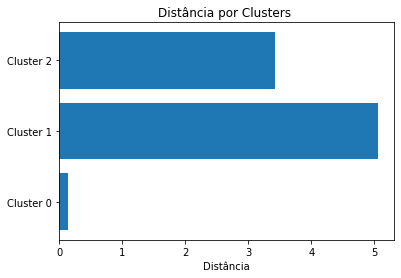

In [ ]:
%matplotlib inline
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

## Imprimindo Rótulos ##

In [ ]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

## Visualizando os Centroids ##

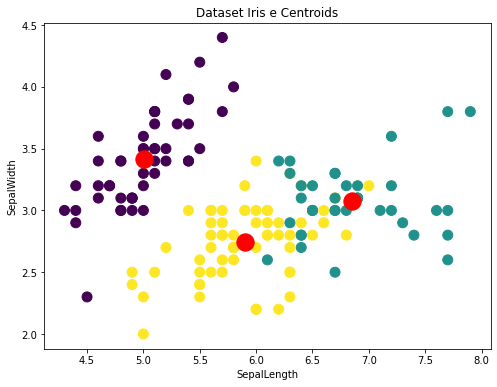

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

## Agrupando novos dados ##

In [ ]:
data = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]
kmeans.predict(data)

array([0, 1, 2])

## Visualizando os resultados ##

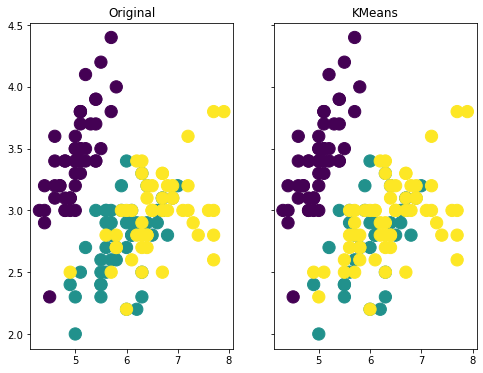

In [ ]:
%matplotlib inline
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(kmeans.labels_))

## Estimando o valor do parametro K - Método Elbow

C:\Users\Leonardo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 680.8243999999996
2 152.36870647733915
3 78.94084142614601
4 57.317873214285726
5 46.56163015873017
6 38.95701115711987
7 34.190687924796634
8 29.95408642103723
9 28.750823444529324
10 26.135948120163302


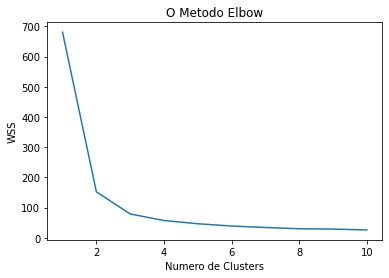

In [ ]:
%matplotlib inline
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(X)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

## Técnicas de Validação

### Matriz de Confusão

In [ ]:
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0         0  36  14   50
1        50   0   0   50
2         0   2  48   50
All      50  38  62  150


### Metricas de classificação

In [ ]:
from sklearn import metrics
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.00      0.00      0.00        50
   Cluster 1       0.00      0.00      0.00        50
   Cluster 0       0.77      0.96      0.86        50

    accuracy                           0.32       150
   macro avg       0.26      0.32      0.29       150
weighted avg       0.26      0.32      0.29       150

